In [101]:
import requests
import json
import pandas as pd
import numpy as np
import time
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['font.sans-serif']=['SimHei']
plt.rcParams['axes.unicode_minus']=False

In [103]:
header = {
    'cookie':'',#不要···忘记···曲奇饼干···
    'User-Agent':'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/136.0.0.0 Safari/537.36 Edg/136.0.0.0'
    }

In [105]:
main_url = 'https://api.bilibili.com/x/web-interface/popular/series/one?number='
list_url = 'https://api.bilibili.com/x/web-interface/popular/series/list'

In [107]:
list_res = requests.get(list_url,headers=header,timeout=1)
list_res_json = json.loads(list_res.text)
if list_res_json['code']==0:
    list_list = list_res_json['data']['list']
list_length = len(list_list)
list_length

321

In [109]:
config_name = [] #当期时间
config_label = [] #当期标签

aid = [] #AV号
tname = [] #类别
title = [] #视频标题
pubdate = [] #发布时间
desc = [] #视频简介
duration = [] #时长（min）

owner_mid = [] #作者id
owner_name = [] #作者名

view = [] #观看
danmaku = [] #弹幕
reply = [] #评论
favorite = [] #收藏
coin = [] #投币
share = [] #分享
like = [] #点赞

pub_location = [] #地区
tnamev2 = [] #类别
pid_name_v2 = [] #分区
bvid = [] #BV号
rcmd_reason = [] #推荐理由

In [111]:
def get_data(l,r): 
    for i in range(l,r):
        main_res = requests.get(main_url+str(i),headers=header)
        main_res_json = json.loads(main_res.text)
        if main_res_json['code'] == 0:
            main_config = main_res_json['data']['config']
            main_list = main_res_json['data']['list']
    
            for j in range(len(main_list)):
                
                config_name.append(main_config.get('name',None))
                config_label.append(main_config.get('label',None))
            
                aid.append(main_list[j].get('aid',None))
                tname.append(main_list[j].get('tname',None))
                title.append(main_list[j].get('title',None))
                pubdate.append(main_list[j].get('pubdate',None))
                desc.append(main_list[j].get('desc',None))
                duration.append(main_list[j].get('duration',None))
        
                owner = main_list[j]['owner']
                owner_mid.append(owner.get('mid',None))
                owner_name.append(owner.get('name',None))
                
                stat = main_list[j]['stat']
                view.append(stat.get('view',None))
                danmaku.append(stat.get('danmaku',None))
                reply.append(stat.get('reply',None))
                favorite.append(stat.get('favorite',None))
                coin.append(stat.get('coin',None))
                share.append(stat.get('share',None))
                like.append(stat.get('like',None))
                
                pub_location.append(main_list[j].get('pub_location',None))
                tnamev2.append(main_list[j].get('tnamev2',None))
                pid_name_v2.append(main_list[j].get('pid_name_v2',None))
                bvid.append(main_list[j].get('bvid',None))
                rcmd_reason.append(main_list[j].get('rcmd_reason',None))
        else:
            print('第'+str(i)+'期失败')
            break;

In [120]:
get_data(1,105)
time.sleep(10)
get_data(106,201)
time.sleep(10)
get_data(201,323)

In [263]:
data = {
    '期名':config_name,
    '期标签':config_label,
    'AV号':aid,
    'BV号':bvid,
    '分区':pid_name_v2,
    '类别':tnamev2,
    '种类':tname,
    '视频标题':title,
    '视频简介':desc,
    '发布时间':pubdate,
    '发布地区':pub_location,
    '时长':duration,
    '作者id':owner_mid,
    '作者名':owner_name,
    '观看量':view,
    '弹幕数量':danmaku,
    '评论数量':reply,
    '点赞量':like,
    '收藏量':favorite,
    '投币量':coin,
    '转发次数':share,
    '推荐理由':rcmd_reason,
    }
data = pd.DataFrame(data)
data.head()

,期名,期标签,AV号,BV号,分区,类别,种类,视频标题,视频简介,发布时间,...,作者id,作者名,观看量,弹幕数量,评论数量,点赞量,收藏量,投币量,转发次数,推荐理由
0,2019第1期 03.22 - 03.28,第1期(0329更新),46900196,BV14b411J7ML,vlog,其他vlog,出行,这集vlog我们拍了十年，致最美好的青春,我在18岁认识了你，\n然后我们开始了长达8年的异地恋，\n2019年03月16日\n我们在...,1553152210,...,326257138,AresserA木恩木,5291226,68823,22401,506117,239069,552760,212104,暴风流泪推荐！今天也是为别人的神仙爱情流泪的一天！
1,2019第1期 03.22 - 03.28,第1期(0329更新),47211520,BV15b41147uu,三农,打野采摘,三农,华农兄弟：兄弟家的鱼跑河里去了，帮他网回来，一网下去还不少,华农兄弟：兄弟家的鱼跑河里去了，帮他网回来，一网下去还不少,1553427011,...,250858633,华农兄弟,2597152,21706,5662,76837,4606,28555,2646,村霸兄弟又上线了！这次他们把魔抓伸向了兄弟家的鱼！
2,2019第1期 03.22 - 03.28,第1期(0329更新),46567722,BV1xb411n7L6,影视,影视剪辑,影视剪辑,【性转版】回家的诱惑,性转版回家的诱惑\n都市男人拯救幸福情仇大戏\n认真你就输了23333,1552823023,...,9813844,兰彻lancche,4871898,43825,12855,251293,148897,216302,160208,无论是创意、配音还是剪辑，全都是超高质量！
3,2019第1期 03.22 - 03.28,第1期(0329更新),47151947,BV1Qb41177Vm,二次元,动漫评论,动漫杂谈,哆啦A梦结局背后的秘密？从未播出的黑历史？真相出人意料,微博：@瓶子君152\n关注关注关注关注关注关注关注关注关注关注关注关注\n三连三连三连三连...,1553396443,...,730732,瓶子君152,2632255,5081,3431,161323,52642,134616,4288,
4,2019第1期 03.22 - 03.28,第1期(0329更新),46797630,BV1Rb411E7yi,美食,美食记录,美食侦探,在中国挑战通宵卖烧烤！为啥美国没有这个？,在美国我们很少有深夜美食，但是在中国却很多，那么，通宵卖烧烤是怎样的一种生活呢？\n\n关注...,1553050747,...,176037767,我是郭杰瑞,2640509,14319,3513,77384,5156,18916,2074,


In [265]:
# data.to_csv('bilibili_popular_data.csv', index=False, encoding='utf-8')

In [83]:
data = pd.read_csv('bilibili_popular_data.csv',encoding='utf-8')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11604 entries, 0 to 11603
Data columns (total 22 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   期名      11604 non-null  object
 1   期标签     11604 non-null  object
 2   AV号     11604 non-null  int64 
 3   BV号     11604 non-null  object
 4   分区      11604 non-null  object
 5   类别      11604 non-null  object
 6   种类      11604 non-null  object
 7   视频标题    11604 non-null  object
 8   视频简介    10570 non-null  object
 9   发布时间    11604 non-null  int64 
 10  发布地区    7590 non-null   object
 11  时长      11604 non-null  int64 
 12  作者id    11604 non-null  int64 
 13  作者名     11604 non-null  object
 14  观看量     11604 non-null  int64 
 15  弹幕数量    11604 non-null  int64 
 16  评论数量    11604 non-null  int64 
 17  点赞量     11604 non-null  int64 
 18  收藏量     11604 non-null  int64 
 19  投币量     11604 non-null  int64 
 20  转发次数    11604 non-null  int64 
 21  推荐理由    11560 non-null  object
dtypes: int64(11), object(1

In [85]:
data.shape

(11604, 22)

In [87]:
(data.isna().sum()/data.shape[0]).apply(lambda x:format(x,'.2%'))

期名       0.00%
期标签      0.00%
AV号      0.00%
BV号      0.00%
分区       0.00%
类别       0.00%
种类       0.00%
视频标题     0.00%
视频简介     8.91%
发布时间     0.00%
发布地区    34.59%
时长       0.00%
作者id     0.00%
作者名      0.00%
观看量      0.00%
弹幕数量     0.00%
评论数量     0.00%
点赞量      0.00%
收藏量      0.00%
投币量      0.00%
转发次数     0.00%
推荐理由     0.38%
dtype: object

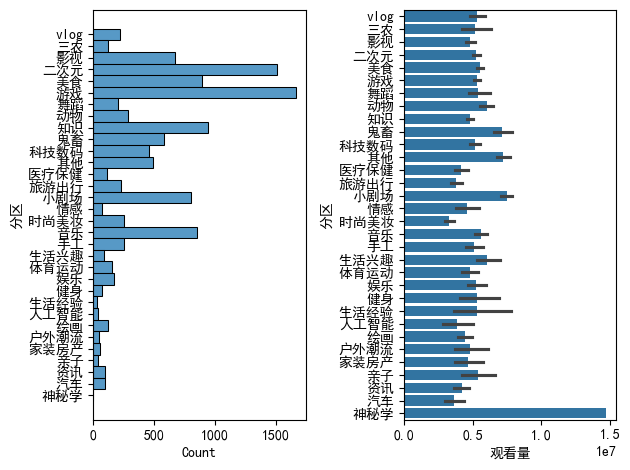

In [89]:
fig,ax = plt.subplots(1,2)
sns.histplot(y='分区',data=data,ax = ax[0])
sns.barplot(y='分区',x='观看量',data=data,ax = ax[1])
plt.tight_layout()
plt.show()

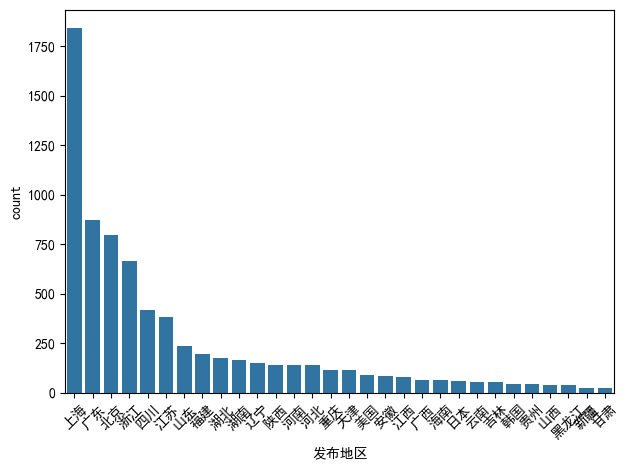

In [95]:
sns.barplot(data['发布地区'].value_counts().head(30))
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

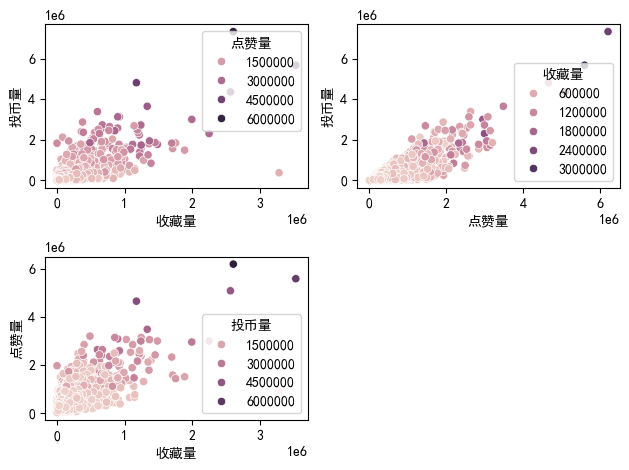

In [93]:
fig,ax = plt.subplots(2,2)
sns.scatterplot(y='投币量',x='收藏量',data=data,hue='点赞量',ax = ax[0][0])
sns.scatterplot(y='投币量',x='点赞量',data=data,hue='收藏量',ax = ax[0][1])
sns.scatterplot(y='点赞量',x='收藏量',data=data,hue='投币量',ax = ax[1][0])
fig.delaxes(ax[1, 1])
plt.tight_layout()
plt.show()

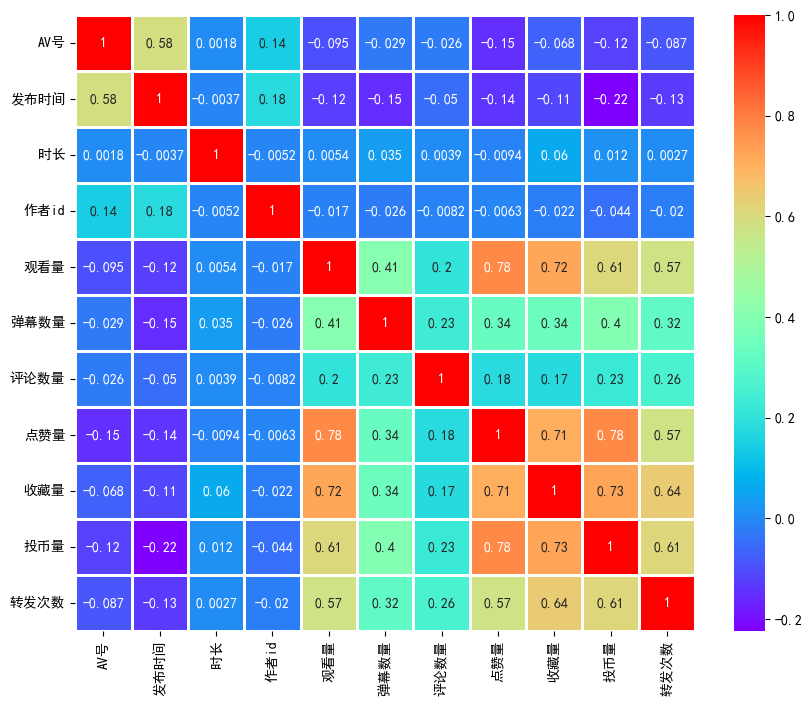

In [97]:
sns.heatmap(data.select_dtypes('number').corr(),annot=True,cmap='rainbow',linewidth=2)
fig=plt.gcf()
fig.set_size_inches(10,8)
plt.show()